In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP1000
n=1000

#Fitxer que contè en TPM els gens codifcants de PROTEÏNES més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensTPM_noversio_PROTEIN_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000198712,ENSG00000198899,ENSG00000198938,ENSG00000198804,ENSG00000198886,ENSG00000198763,ENSG00000198888,ENSG00000198727,ENSG00000228253,...,ENSG00000165443,ENSG00000141503,ENSG00000181195,ENSG00000213983,ENSG00000112290,ENSG00000085662,ENSG00000114902,ENSG00000124140,ENSG00000142669,ENSG00000248485
0,Brain - Cortex,59480,57190,43790,51600,48610,32840,36570,32050,32400,...,111.60,110.10,1.0280,71.96,84.63,71.10,84.34,79.18,71.44,36.61
1,Brain - Cerebellum,49380,50440,37730,27340,45150,25620,30180,30980,32770,...,86.75,147.60,4.5950,255.40,68.70,98.03,64.82,220.40,56.09,48.93
2,Brain - Cortex,62980,66050,48110,75880,63390,32590,45930,31380,30880,...,86.88,89.59,1.4450,85.29,70.00,65.50,65.90,81.75,57.33,36.38
3,Brain - Cerebellum,51110,50770,43170,60530,54370,28230,36340,31450,26920,...,56.50,127.60,34.8000,320.00,47.01,99.54,40.47,164.20,47.27,15.24
4,Brain - Cortex,62790,47390,56100,70590,45050,36770,38690,29500,28460,...,93.54,97.42,3.7070,87.21,110.30,88.90,87.57,119.60,65.27,41.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,60430,54270,52260,54240,42870,26570,36790,26310,35480,...,90.99,120.90,2.6240,78.43,96.78,86.47,77.86,104.90,71.85,50.61
2637,Brain - Cerebellum,44910,49800,38950,39790,52370,29630,35390,31610,24780,...,76.88,148.70,29.2200,295.60,62.57,101.00,67.79,173.20,52.73,14.50
2638,Brain - Cortex,47760,49580,42730,51040,50630,38830,40840,30990,28390,...,64.03,82.09,0.8665,89.32,65.96,61.29,84.70,64.22,70.01,20.25
2639,Brain - Cerebellum,56890,60010,41590,33670,46580,38390,42170,42080,37540,...,66.43,136.20,1.7420,236.60,65.93,106.30,42.27,190.70,42.90,11.39


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

21 components expliquen un 95% de la variança. De 1000 dimensions a 21


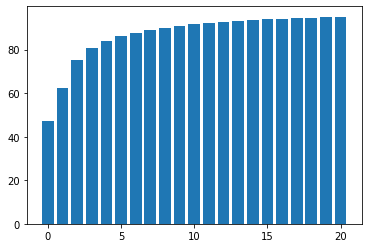

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,5.706749,-8.744169,-7.530930,-6.136772,-7.173011,-2.342329,-3.304599,-0.421275,-8.476312,2.716336,...,-2.367897,-3.155388,2.686409,1.951351,1.818465,-0.362403,4.146786,1.033795,0.012704,-0.727243
1,-25.367157,22.224908,-8.461983,4.415876,-1.841003,2.125740,-2.196652,-1.994224,-1.227484,-0.547286,...,-1.354535,-0.273392,-0.991244,-0.986663,-0.498505,-1.793962,0.186408,0.507710,2.635105,1.191221
2,35.688815,5.212763,-12.197178,-8.639958,3.531083,-0.322398,12.444476,8.836986,1.612592,3.119764,...,8.298529,0.976195,-1.970939,9.797317,-0.098500,0.040810,-0.977308,0.245600,-2.547060,0.240653
3,57.022399,7.001818,-13.329464,-2.428898,0.591406,-1.794722,0.470565,-3.534866,3.378085,4.022429,...,-0.176289,-0.667556,1.169671,-0.635644,0.909924,1.437535,-2.450426,-1.873903,2.442365,1.686776
4,19.355793,-3.211326,-8.744751,-6.515851,-5.199940,4.404480,-0.210382,-3.705856,1.314600,2.252969,...,1.465640,2.328442,-1.636337,-3.196898,-0.471253,-2.262278,-1.981810,0.501609,0.594491,-0.963083


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,SMTSD
0,5.706749,-8.744169,-7.530930,-6.136772,-7.173011,-2.342329,-3.304599,-0.421275,-8.476312,2.716336,...,-3.155388,2.686409,1.951351,1.818465,-0.362403,4.146786,1.033795,0.012704,-0.727243,Brain - Hippocampus
1,-25.367157,22.224908,-8.461983,4.415876,-1.841003,2.125740,-2.196652,-1.994224,-1.227484,-0.547286,...,-0.273392,-0.991244,-0.986663,-0.498505,-1.793962,0.186408,0.507710,2.635105,1.191221,Brain - Cerebellum
2,35.688815,5.212763,-12.197178,-8.639958,3.531083,-0.322398,12.444476,8.836986,1.612592,3.119764,...,0.976195,-1.970939,9.797317,-0.098500,0.040810,-0.977308,0.245600,-2.547060,0.240653,Brain - Frontal Cortex (BA9)
3,57.022399,7.001818,-13.329464,-2.428898,0.591406,-1.794722,0.470565,-3.534866,3.378085,4.022429,...,-0.667556,1.169671,-0.635644,0.909924,1.437535,-2.450426,-1.873903,2.442365,1.686776,Brain - Nucleus accumbens (basal ganglia)
4,19.355793,-3.211326,-8.744751,-6.515851,-5.199940,4.404480,-0.210382,-3.705856,1.314600,2.252969,...,2.328442,-1.636337,-3.196898,-0.471253,-2.262278,-1.981810,0.501609,0.594491,-0.963083,Brain - Frontal Cortex (BA9)


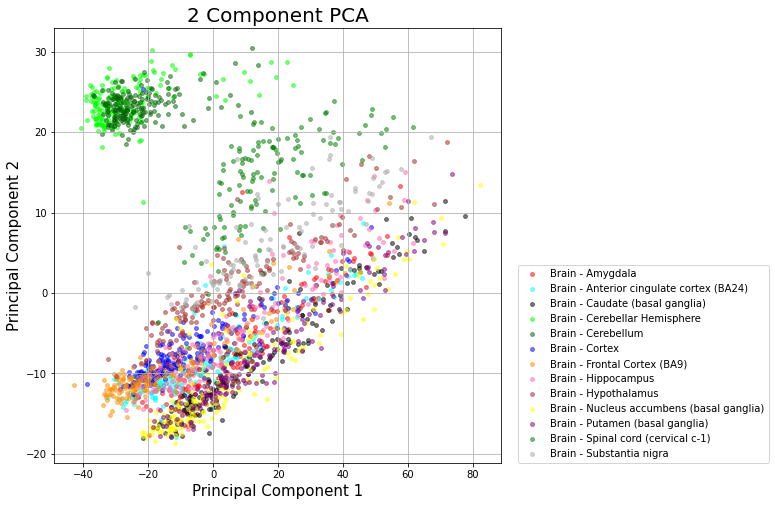

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

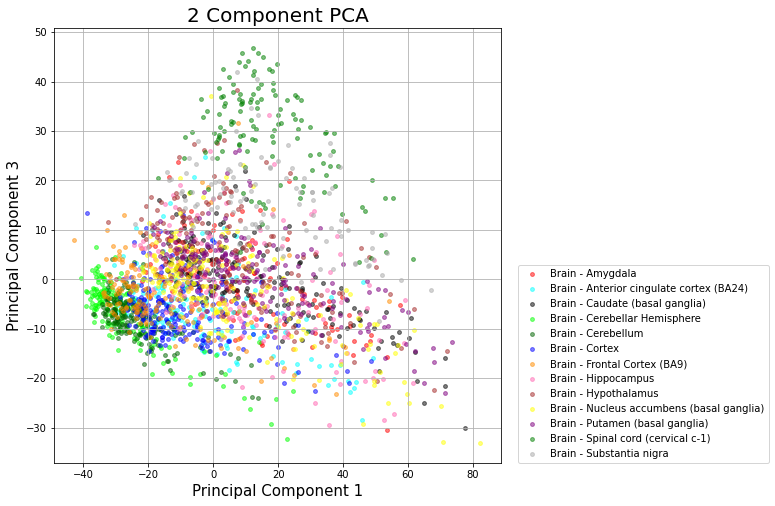

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.002s...
[t-SNE] Computed neighbors for 2112 samples in 0.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 5.449031
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.910660
[t-SNE] KL divergence after 1000 iterations: 0.935178


,X,Y,Tipus Teixit
0,-21.363014,-1.052345,Brain - Hippocampus
1,57.304642,-22.386673,Brain - Cerebellum
2,-6.803566,-12.374754,Brain - Frontal Cortex (BA9)
3,7.688172,-16.598429,Brain - Nucleus accumbens (basal ganglia)
4,-10.250614,0.563188,Brain - Frontal Cortex (BA9)


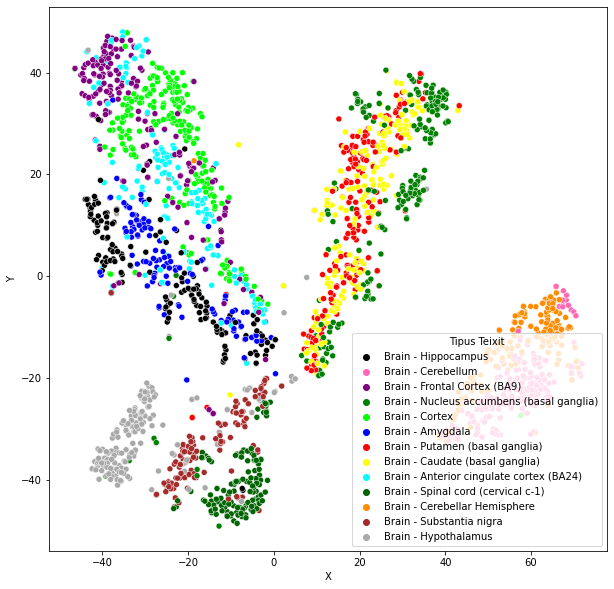

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
7 # Prec. mitjana:  76.70414915496735  desv.:  2.213867093240502  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
12 # Prec. mitjana:  76.42023607261021  desv.:  2.5591813354299027  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
26 # Prec. mitjana:  75.85285701511224  desv.:  2.0331856541102993  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
4 # Prec. mitjana:  77.08441384243943  desv.:  2.3395696729566295  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
3 # Prec. mitjana:  77.13113654654387  desv.:  2.058669249363099  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
2 # Prec. mitjana:  77.36787981758025  desv.:  2.398429513929772  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
8 # Prec. mitjana:  76.65742645086291  desv.:  1.3854218626424266  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
1 # Prec. mitjana:  77.41437896807653  desv.:  2.080077369028764  paràmetres:  {'n_neigh

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,23,1,0,0,0,0,0,10,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),1,18,0,0,0,1,8,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,38,0,0,0,1,0,0,3,10,0,0
Brain - Cerebellar Hemisphere,0,0,0,45,6,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,3,52,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,40,1,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),4,3,0,0,0,2,24,0,0,0,0,0,0
Brain - Hippocampus,11,1,0,0,0,0,2,25,0,0,0,0,2
Brain - Hypothalamus,0,0,0,1,0,0,0,0,33,1,0,1,3


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
52 # Prec. mitjana:  29.07404095502101  desv.:  1.5947632511974674  paràmetres:  {'C': 0.01, 'gamma': 0.001}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
61 # Prec. mitjana:  14.062863274613251  desv.:  0.7408791878337482  paràmetres:  {'C': 0.01, 'gamma': 0.005}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
62 # Prec. mitjana:  10.038004113386389  desv.:  0.195

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,32,0,0,0,0,0,0,2,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,26,0,0,0,0,2,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,47,0,0,0,1,0,0,1,3,0,0
Brain - Cerebellar Hemisphere,0,0,0,50,1,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,1,54,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,41,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,1,0,0,0,0,32,0,0,0,0,0,0
Brain - Hippocampus,7,3,0,0,0,0,1,30,0,0,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,0,34,1,0,1,2


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
129 # Prec. mitjana:  52.08374318161495  desv.:  2.443223601866058  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
127 # Prec. mitjana:  52.131136546543864  desv.:  2.4391135108416018  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
127 # Prec. mitjana:  52.131136546543864  desv.:  2.4391135108416018  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
130 # Prec. mitjana:  52.036349816686055  desv.:  2.455573003876649  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
132 # Prec. mitjana:  51.98895645175714  desv.:  2.4486728001859013  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
130 # Prec. mitjana:  52.036349816686055  desv.:  2.455573003876649  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  43.8918447643745  desv.:  2.437967058792094  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  33.90145756952517  desv.:  0.8987993875657376

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,21,5,0,0,0,0,2,5,0,0,0,1,0
Brain - Anterior cingulate cortex (BA24),6,16,0,0,0,0,6,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,32,0,0,0,1,0,1,5,13,0,0
Brain - Cerebellar Hemisphere,0,0,0,41,10,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,7,48,0,0,0,0,0,0,0,0
Brain - Cortex,1,3,0,0,0,36,2,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,9,0,0,0,2,21,0,0,0,0,1,0
Brain - Hippocampus,11,4,0,0,0,1,4,18,1,1,0,1,0
Brain - Hypothalamus,0,0,1,0,0,0,0,1,30,3,0,0,4


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
66 # Prec. mitjana:  76.37440758293839  desv.:  2.0213145129986847  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
56 # Prec. mitjana:  78.74295806134312  desv.:  2.514191666167991  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
54 # Prec. mitjana:  79.0735938478047  desv.:  2.20233523635932  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
52 # Prec. mitjana:  79.87749262273094  desv.:  2.267231671173307  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
53 # Prec. mitjana:  79.73508897433604  desv.:  1.5911164654482661  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
51 # Prec. mitjana:  79.92510954126799  desv.:  2.3136803663124375  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
65 # Prec. mitjana:  76.421353840651  desv.:  2.049822949737975  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
50 # Prec. mitjana:  80.58638111419117  desv.:  2.382865124105226  paràmetres:  {'max_depth': 7, 'n_estimators': 50

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,29,1,0,0,0,1,0,3,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),3,19,0,0,0,0,6,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,43,0,0,0,1,0,0,3,5,0,0
Brain - Cerebellar Hemisphere,0,0,0,46,5,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,3,52,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,40,1,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),3,1,0,0,0,2,27,0,0,0,0,0,0
Brain - Hippocampus,4,2,1,0,0,0,3,31,0,0,0,0,0
Brain - Hypothalamus,0,0,0,0,0,0,0,0,33,1,0,0,5


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 77.41%
Model kNN, Accuracy de test és: 79.77%
##################################################
Model Svm Accuracy: 89.54%
Model Svm, Accuracy de test és: 92.25%
##################################################
Model Arbre de Decisió: 71.55%
Model Arbre de Decisió, Accuracy de test és: 72.78%
##################################################
Model Random Forest: 84.09%
Model Random Forest, Accuracy de test és: 86.96%
